In [332]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
import math


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [254]:
df = pd.read_csv("creditcard.csv")
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [329]:
# Split data
#fraud_df = df[df["Class"] == 1]
#non_fraud_df = df[df["Class"] == 0].sample(n=len(fraud_df), random_state=42)

# Combine and shuffle
#balanced_df = pd.concat([fraud_df, non_fraud_df]).sample(frac=1, random_state=42)

# Redefine X, Y
X = df.drop(columns=["Time", "Class"]).to_numpy()
Y = df["Class"].to_numpy()

X_transformed = np.copy(X)
for i in range (X_transformed.shape[0]):
    mean = np.mean(X_transformed[i])
    stdev = np.std(X_transformed[i])
    X_transformed[i] = (X_transformed[i] - mean)/stdev
"""X = df.drop("Class", axis=1)
X = df.drop("Time", axis=1)
X_arr = np.array(X)

    
#amount_mean = np.mean(X_arr[X_arr.shape[0] - 1])
#amount_stdev = np.std(X_arr[X_arr.shape[0] - 1])
#X_transformed[X_transformed.shape[0] - 1] = (X_transformed[X_transformed.shape[0] - 1] - amount_mean)/amount_stdev
Y = df["Class"]
Y_arr = np.array(Y) """

x_train, x_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(227845, 29) (227845,) (56962, 29) (56962,)


In [325]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_cost(x, y, w, b, lambda_val, pos_weight):
    ''' Formula: cost = mean(-y[i]* log(pred[x[i]]) - (1-y[i])*log(1-pred[x[i]])) + lambda/2m * sum(w^j)'''
    ''' Dimensions: X (m, n), y (m, 1), w (n, 1), b (1, 1)'''
    total_cost = 0
    m, n = x.shape
    #print(pos_weight, neg_weight)
    for i in range (m):
        epsilon = 0
        pred_i = np.clip(sigmoid(np.dot(x[i], w) + b), epsilon, 1 - epsilon)
        #pred_i = sigmoid(np.dot(x[i], w) + b)
        #print(pred_i, x[i])
        #loss = -(pos_weight * y[i]*math.log(pred_i) + ((neg_weight) * (1-y[i]) * math.log(1-pred_i)))
        if y[i] == 1:
            loss = -(pos_weight* math.log(pred_i))
        else:
            loss = -math.log(1 - pred_i)
        #print("reached here", loss)
        total_cost += loss
    total_cost /=m

    regularized_value = np.sum(np.square(w))
    regularized_value *= (lambda_val / (2 * m))

    total_cost += regularized_value
    return total_cost

def compute_gradient(x, y, w, b, lambda_val):
    ''' Formula: dw = mean(pred_i - y[i] * x[i][j])
                 db = mean(pred_i - y[i])'''
    m, n = x.shape
    dw = np.zeros(n)
    db = 0

    for i in range(m):
        pred_i = sigmoid(np.dot(x[i], w) + b)
        db += pred_i - y[i]
        for j in range(n):
            dw[j] += (pred_i - y[i]) * x[i][j]

    # Regularization term for dw (exclude b from regularization)
    dw = dw / m + (lambda_val * w) / m
    db /= m

    return dw, db

0.8412749205467211
0.5734912733782994
0.524859098502988
0.4957690397009261
0.4753036593012867
0.45968976318827254
0.4471925735067774
0.436866357337621
0.4281349648380286
0.4206200085922337
0.4140594046441522
0.40826431297976384
0.4030944417261569
0.39844297672508594
0.3942269295453834
0.3903807122106986
0.38685172235776105
0.38359722845788924
0.38058212236021827
0.3777772660316419


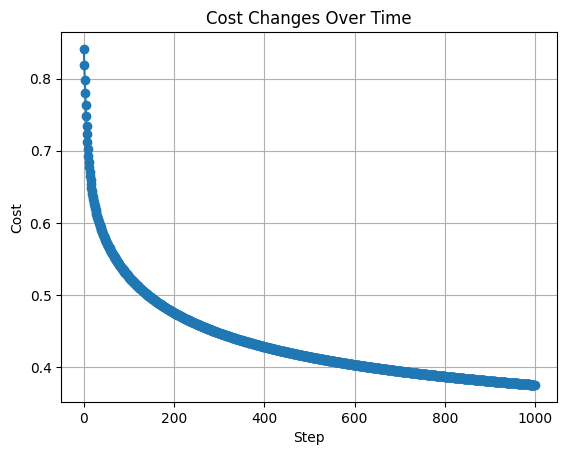

In [326]:
#w = np.random.rand(x_train.shape[1]) * 0.01
w = np.random.rand(x_train.shape[1])
b = 0
alpha = 0.015
lambda_val = 0.1
iterations = 1000
pos_weight = 1
costs = []
steps = list(range(iterations))
for i in range (iterations):
    cost = compute_cost(x_train, y_train, w, b, lambda_val, pos_weight)
    dw, db = compute_gradient(x_train, y_train, w, b, lambda_val)
    w -= alpha * dw
    b -= alpha * db
    costs.append(cost)
    if i % 50 == 0:
        print(cost)

plt.plot(steps, costs, marker='o')
plt.xlabel("Step")
plt.ylabel("Cost")
plt.title("Cost Changes Over Time")
plt.grid(True)
plt.show()


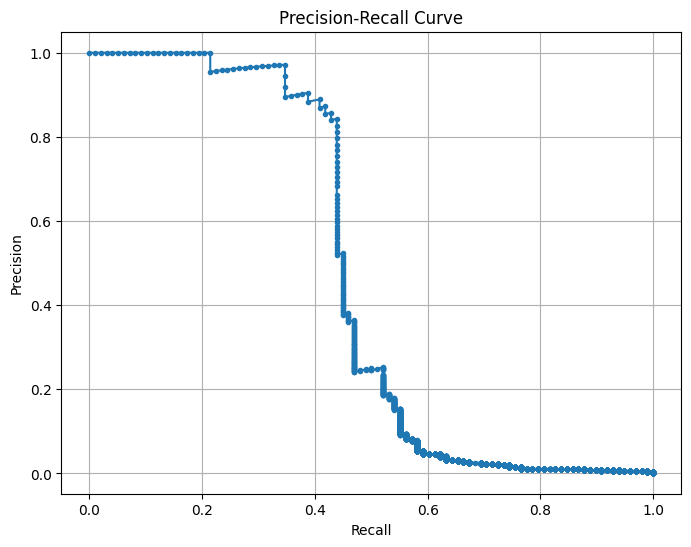

PR AUC: 0.464631133354345
Evaluation Results: Accuracy: 0.9459815315473473, Precision: 0.02244309073420968, Recall: 0.7142857142857143, F1: 0.043518806341311785


In [333]:
y_pred = sigmoid(np.dot(x_test, w) + b)
y_bound = np.zeros(y_pred.shape[0])
for pred in range(y_pred.shape[0]):
    y_bound[pred] = 1 if y_pred[pred] > 0.5 else 0

precision, recall, thresholds = precision_recall_curve(
    y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

accuracy = accuracy_score(y_test, y_bound)
precision = precision_score(y_test, y_bound)
recall = recall_score(y_test, y_bound)
f1 = f1_score(y_test, y_bound)


pr_auc = average_precision_score(y_test, y_pred)
print("PR AUC:", pr_auc)

print(f"Evaluation Results: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")

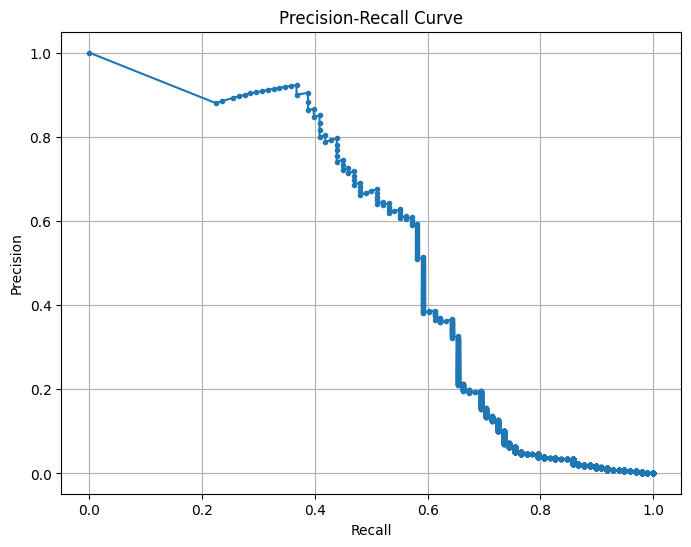

PR AUC: 0.5300321497076553
Evaluation Results: Accuracy: 0.9623784277237456, Precision: 0.036281179138321996, Recall: 0.8163265306122449, F1: 0.0694745983499783


In [335]:
model = LogisticRegression(
    class_weight="balanced",  # automatically inverse-weights by freq.
    C=1.0,                     # inverse of regularization strength
    max_iter=1000,
    random_state=42
)
model.fit(x_train, y_train)

y_pred = model.predict_proba(x_test)
y_pred_binary = model.predict(x_test)
y_pred_cleaned = np.zeros(y_pred.shape[0])
for pred in range (y_pred.shape[0]):
    y_pred_cleaned[pred] = y_pred[pred][1]
precision, recall, thresholds = precision_recall_curve(
    y_test, y_pred_cleaned)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

pr_auc = average_precision_score(y_test, y_pred_cleaned)
print("PR AUC:", pr_auc)
print(f"Evaluation Results: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")